# 实验任务

选取Mushroom数据集，根据22个特征对蘑菇的有毒与无毒进行分类。

http://archive.ics.uci.edu/ml/datasets/Mushroom

![](mush.png)

# 数据预处理

In [1]:
# 导入包
import pandas as pd
import numpy as np

In [2]:
# 读取数据
data = pd.read_csv('agaricus-lepiota.data',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

下图显示了有毒和无毒两类蘑菇的分布情况

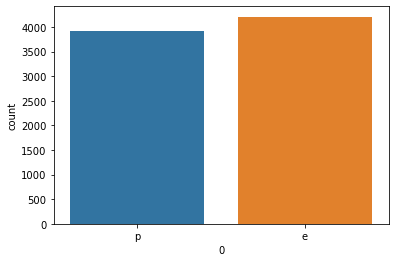

In [4]:
sns.countplot(data[0])

下图显示各个特征情况下有毒与无毒的分类情况。我们可以发现一些现象，比如第16个特征没有对分类起到任何作用，第6、17个特征几乎没起到作用。

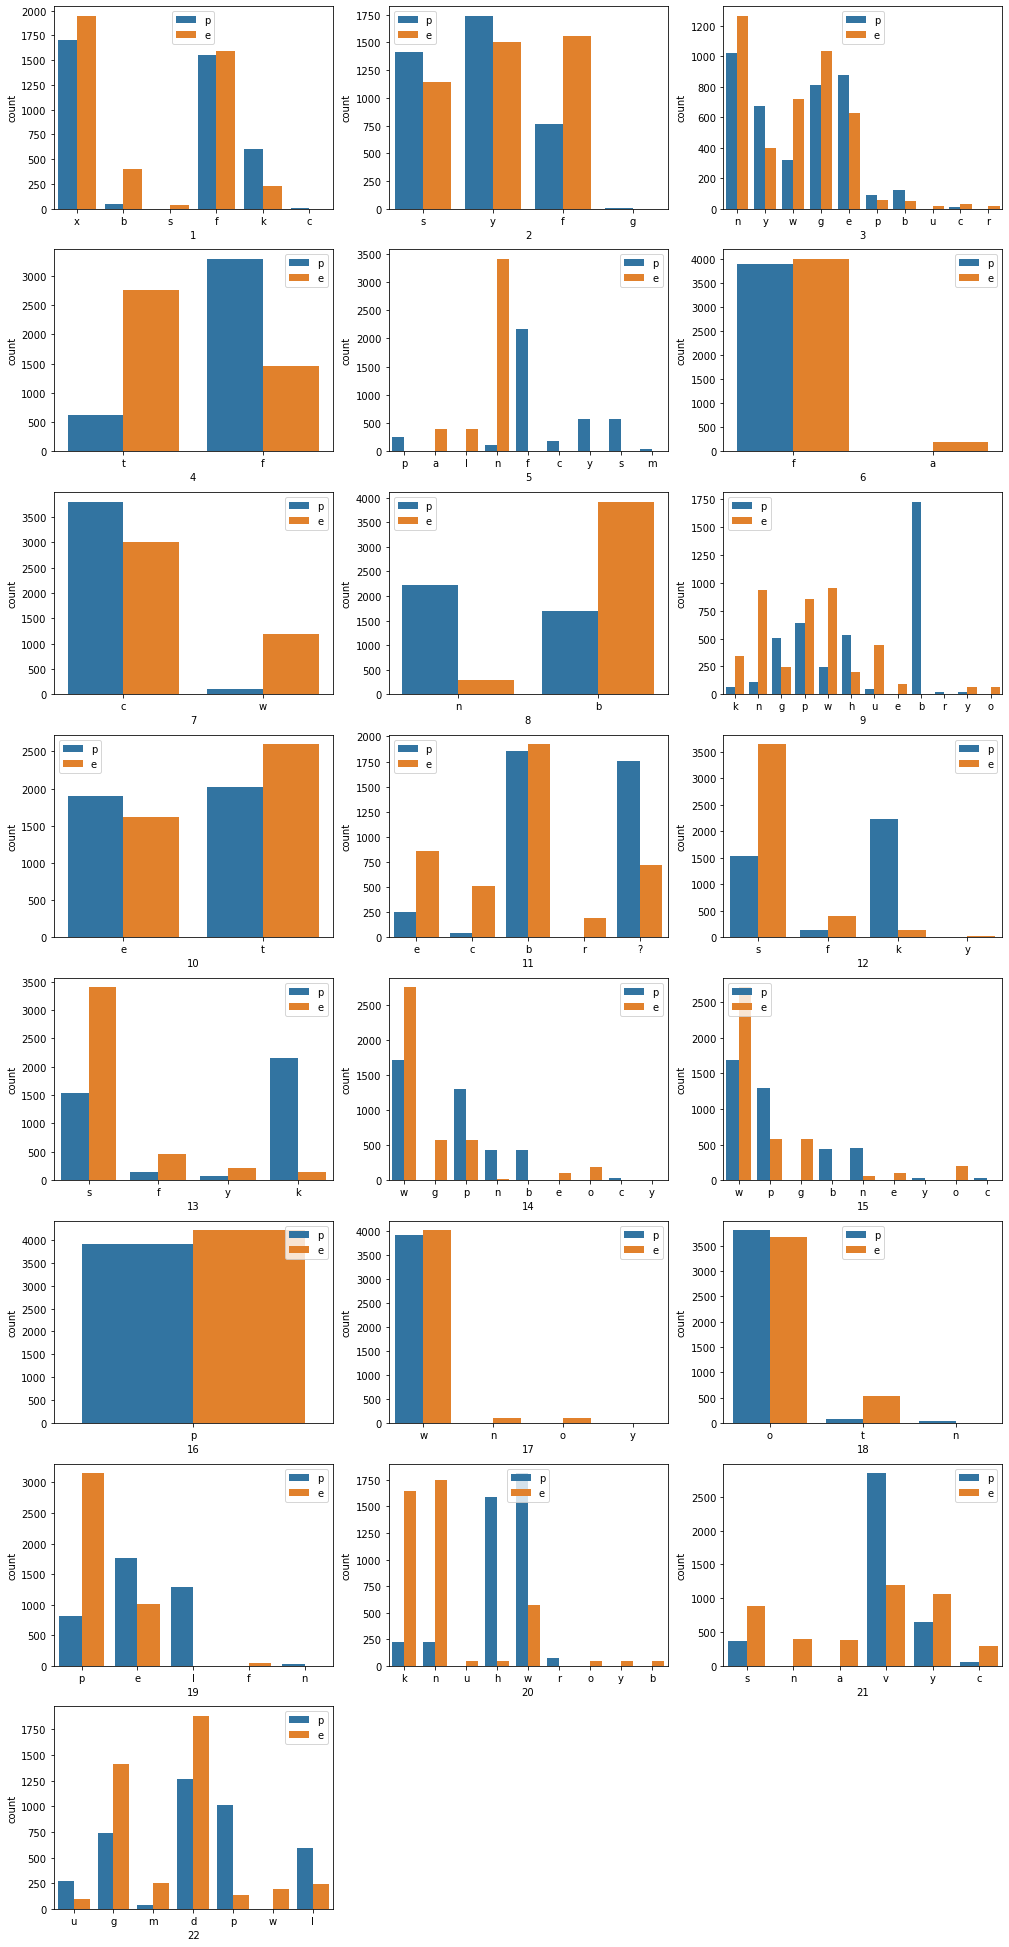

In [5]:
plt.figure(figsize=(17,35))
m=1
for i in range(1,23):
    plt.subplot(8, 3, m)
    sns.countplot(x=data[i],hue=data[0])
    m=m+1

In [6]:
# 查看各个属性有几种情况
for col in data.columns:
    print(col, ':', data[col].unique())

0 : ['p' 'e']
1 : ['x' 'b' 's' 'f' 'k' 'c']
2 : ['s' 'y' 'f' 'g']
3 : ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
4 : ['t' 'f']
5 : ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
6 : ['f' 'a']
7 : ['c' 'w']
8 : ['n' 'b']
9 : ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
10 : ['e' 't']
11 : ['e' 'c' 'b' 'r' '?']
12 : ['s' 'f' 'k' 'y']
13 : ['s' 'f' 'y' 'k']
14 : ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
15 : ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
16 : ['p']
17 : ['w' 'n' 'o' 'y']
18 : ['o' 't' 'n']
19 : ['p' 'e' 'l' 'f' 'n']
20 : ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
21 : ['s' 'n' 'a' 'v' 'y' 'c']
22 : ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [7]:
# 查看是否有缺失值
data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

根据以上两步骤的观察，首先，可以发现第16个属性只有一种，这并没有对分类起到任何作用，其次，该数据集并没有显示的缺失值。

我们可以将第16个属性去掉

In [8]:
data.drop(columns = 16, inplace = True)

根据该数据集的介绍文件，数据集的缺失值其实只存在于第11个属性中并且将其以'?'代替。

In [9]:
# 检查是否有缺失值
data[11].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: 11, dtype: int64

考虑到缺失比例较大，不妨将其当作一种特殊的值去处理。

以下将数据转为数值型，将类别属性名映射到一个数值上。

In [10]:
# 导入包
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])
    mapped_dict = {i:v for i,v in enumerate(encoder.classes_)}
    print(f"{column} : {mapped_dict}")

0 : {0: 'e', 1: 'p'}
1 : {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'}
2 : {0: 'f', 1: 'g', 2: 's', 3: 'y'}
3 : {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'p', 6: 'r', 7: 'u', 8: 'w', 9: 'y'}
4 : {0: 'f', 1: 't'}
5 : {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'}
6 : {0: 'a', 1: 'f'}
7 : {0: 'c', 1: 'w'}
8 : {0: 'b', 1: 'n'}
9 : {0: 'b', 1: 'e', 2: 'g', 3: 'h', 4: 'k', 5: 'n', 6: 'o', 7: 'p', 8: 'r', 9: 'u', 10: 'w', 11: 'y'}
10 : {0: 'e', 1: 't'}
11 : {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'}
12 : {0: 'f', 1: 'k', 2: 's', 3: 'y'}
13 : {0: 'f', 1: 'k', 2: 's', 3: 'y'}
14 : {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'}
15 : {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'}
17 : {0: 'n', 1: 'o', 2: 'w', 3: 'y'}
18 : {0: 'n', 1: 'o', 2: 't'}
19 : {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'}
20 : {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'}
21 : {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5:

In [11]:
# 划分标签与属性
y=data[0]
X=data.drop(0, axis=1)
X

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


可以根据下图查看各个特征之间的关系

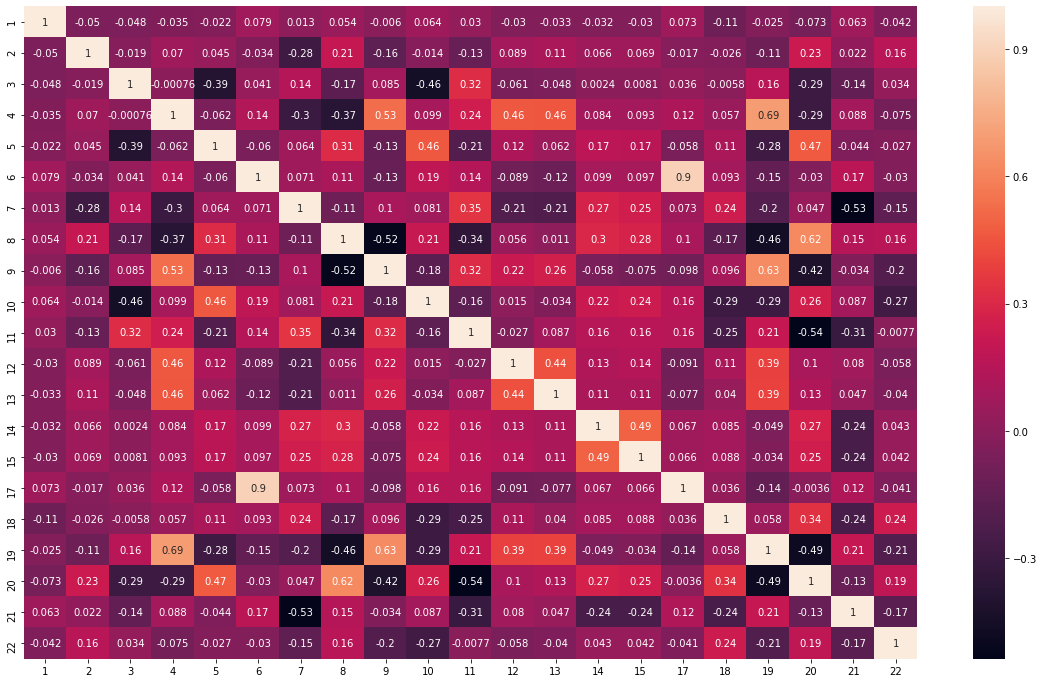

In [12]:
cor_mat = X.corr()
plt.figure(figsize = (20, 12))
sns.heatmap(cor_mat, annot = True)

# 建立模型

In [13]:
# 导入包
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# 划分训练集与测试集8：2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

## 使用KNN

最近邻 (k-Nearest Neighbors， KNN) 算法是一种分类算法， 1968年由 Cover和 Hart 提出， 应用场景有字符识别、 文本分类、 图像识别等领域。
该算法的思想是： 一个样本与数据集中的k个样本最相似， 如果这k个样本中的大多数属于某一个类别， 则该样本也属于这个类别。

对于K值的选择。
如果选择较小的K值，就相当于用较小的邻域中的训练实例进行预测，学习的近似误差会减小，只有与输入实例较近的训练实例才会对预测结果起作用，缺点是学习的估计误差会增大，预测结果会对近邻的实例点分成敏感。如果邻近的实例点恰巧是噪声，预测就会出错。换句话说，K值减小就意味着整体模型变复杂，分的不清楚，就容易发生过拟合。
如果选择较大K值，就相当于用较大邻域中的训练实例进行预测，其优点是可以减少学习的估计误差，但近似误差会增大，也就是对输入实例预测不准确，K值得增大就意味着整体模型变的简单。
（近似误差：对现有训练集的训练误差。估计误差：对测试集的测试误差。）

以下采取K折交叉验证的方法选取适当的K，在训练集中划分出验证集，将原始训练集数据分为k组（一般是均分），将每个子集数据分别做一次验证集，其余的k-1组子集数据作为新训练集，这样会得到k个模型，用这k个模型的验证集的分类准确率的平均数作为模型的性能指标，进而选择较适合的超参数。
![](1.png)

In [14]:
# 因为版本问题，阻止其报warning
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [15]:
# 交叉验证
for k in range(3,20,2):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model,X_train,y_train)
    print(k,scores.mean())

3 0.9979997395102082
5 0.996922555987196
7 0.9959994080035702
9 0.9943067214746278
11 0.9943066504577818
13 0.9930757154627677
15 0.9901527330904273
17 0.987536827561013
19 0.9863056084986144


交叉验证可以发现k=3效果最好

In [28]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
acc_score = accuracy_score(y_test,y_pre)
print(acc_score)

0.9981538461538462


此时任务的准确率就已经接近100%

In [29]:
y_fit = model.predict(X_test)
print(classification_report(y_test, y_fit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



计算出的precision、recall等指标均为100%。

## 使用决策树

决策树是一种机器学习的方法。决策树的生成算法有ID3, C4.5和C5.0等。决策树是一种树形结构，其中每个内部节点表示一个属性上的判断，每个分支代表一个判断结果的输出，最后每个叶节点代表一种分类结果。

在不加限制的情况下，一棵决策树会生长到指标最优，或者没有更多的特征可用为止。这样的决策树往往会过拟合，这就是说，它会在训练集上表现很好，在测试集上却表现糟糕。我们收集的样本数据不可能和整体的状况完全一致，因此当一棵决策树对训练数据有了过于优秀的解释性，它找出的规则必然包含了训练样本中的噪声，并使它对未知数据的拟合程度不足。

为了让决策树有更好的泛化性，我们要对决策树进行剪枝。剪枝策略对决策树的影响巨大，正确的剪枝策略是优化决策树算法的核心。在这里我们采取预剪枝策略，限制决策树的最大深度。

以下采用了CART算法进行决策树学习(默认使用基尼系数作为特征选择标准)，使用交叉验证选取最好的最大深度。

In [18]:
# 交叉验证
for k in range(3,22):
    model = DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(model,X_train,y_train)
    print(k,scores.mean())

3 0.9566088490115093
4 0.9773812055052827
5 0.9790738210173787
6 0.9953837629639478
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0


In [19]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train,y_train)
y_pre = model.predict(X_test)
acc_score = accuracy_score(y_test,y_pre)
print(acc_score)

1.0


选取合适的最大深度，准确率可以达到100%.

In [20]:
y_fit = model.predict(X_test)
print(classification_report(y_test, y_fit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## 使用逻辑回归

计算出的precision、recall等指标均为100%。

二项逻辑斯谛回归模型如下：
$$
P(Y=1|x)=\frac{\exp(wx)}{1+\exp(wx)}
$$
$$
P(Y=0|x)=\frac{1}{1+\exp(wx)}
$$

再应用极大似然估计法估计模型参数$w$.

In [21]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_model.score(X_test, y_test)

0.9483076923076923

该方法准确率接近95%。

In [23]:
y_fit = log_model.predict(X_test)
print(classification_report(y_test, y_fit))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       820
           1       0.96      0.94      0.95       805

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



## 使用SVM

支持向量机是一种二分类模型，它的基本模型是定义在特征空间上的间隔最大的线性分类器，间隔最大使它有别于感知机；SVM还包括核技巧，这使它成为实质上的非线性分类器。SVM的的学习策略就是间隔最大化，可形式化为一个求解凸二次规划的问题，也等价于正则化的合页损失函数的最小化问题。SVM的的学习算法就是求解凸二次规划的最优化算法。

我们这里的核函数使用径向基函数(rbf)，惩罚参数C选取默认的1.0，C值大时对误分类的惩罚增大，C值小时对误分类的惩罚减小。

In [24]:
svm_model = SVC(C=1.0,kernel='rbf')
svm_model.fit(X_train, y_train)
svm_model.score(X_test, y_test)

1.0

In [25]:
y_fit = svm_model.predict(X_test)
print(classification_report(y_test, y_fit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



可以看到使用SVM的准确率达到了100%。precision recall等指标也都是100%，这个分类器在测试集上表现也是完美的。

## 使用神经网络

人工神经网络是一种受人脑神经系统工作方式启发而构造的数学模型，人工神经网络有两类特殊的神经元层，一类用来输入外部信息，另一类用来输出信息，中间添加隐层。多层前馈神经网络有强大的表示能力，只需包含足够多神经元的隐层，多层神经前馈神经网络能以任意精度逼近任意复杂度的连续函数。

由于理论上神经网络可以拟合任何函数，解决了线性不可分情况下的分类问题，这里使用两层神经网络，隐层数量为128，其它参数都选用默认值：激活函数使用relu，优化器使用adam，正则化项参数使用0.0001，batch_size设置为auto，学习率为常数0.001.

In [26]:
nn_model = MLPClassifier(hidden_layer_sizes = 128,activation='relu', solver='adam', alpha=0.0001, 
                                batch_size='auto', learning_rate='constant', learning_rate_init=0.001)
nn_model.fit(X_train, y_train)
nn_model.score(X_test, y_test)

1.0

在测试集上准确率为100%

In [27]:
y_fit = nn_model.predict(X_test)
print(classification_report(y_test, y_fit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# 总结

在根据蘑菇的22个特征判断蘑菇是否有毒的机器学习任务中，我使用了多种监督学习方法：KNN、决策树、逻辑斯谛回归、SVM以及神经网络，其中对于测试集的准确率，KNN接近100%，逻辑斯谛回归接近95%，其余的分类器全部达到了100%。在进行模型训练之前，应该先使用一些可视化方法观察数据特点，做好数据预处理工作，包括缺失值处理等。在具体建立模型的代码实现中，主要调用了sklearn包中的函数。在选取超参数时，采用了k折交叉验证的方法。可以发现，一些模型（SVM、神经网络、决策树）在这一数据集上的表现是非常好的，泛化能力很强，在测试集上的指标是完美的。